# NLP Homework 3 Programming Assignment

## Word Embeddings
Word embeddings or word vectors give us a way to use an efficient, dense representation in which similar words have a similar encoding. We have previously seen one-hot vectors used for representing words in a vocabulary. But, unlike these, word embeddings are capable of capturing the context of a word in a document, semantic and syntactic similarity and relation with other words.

There are several popular word embeddings that are used, some of them are-
- [Word2Vec (by Google)](https://code.google.com/archive/p/word2vec/)
- [GloVe (by Stanford)](https://nlp.stanford.edu/projects/glove/)
- [fastText (by Facebook)](https://fasttext.cc/)

In this assignment, we will be exploring the **word2vec embeddings**, the embedding technique that was popularized by Mikolov et al. in 2013 (refer to the [original paper here](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)). For this, we will be using the GenSim package, find documentation [here](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py). This model is provided by Google and is trained on Google News dataset. Word embeddings from this model have 300 dimensions and are trained on 3 million words and phrases.

### Loading word vectors from GenSim
Fetch and load the `word2vec-google-news-300` pre-trained embeddings. Note that this may take a few minutes.

In [ ]:
import numpy as np
import gensim.downloader as api

def download_word2vec_embeddings():
    print("Downloading pre-trained word embeddings from: word2vec-google-news-300.\n" 
          + "Note: This can take a few minutes.\n")
    wv = api.load("word2vec-google-news-300")
    print("\nLoading complete!\n" +
          "Vocabulary size: {}".format(len(wv.vocab)))
    return wv

word_vectors = download_word2vec_embeddings()

Note: This can take a few minutes.



The loaded `word_vectors` in memory can be accessed like a dictionary to obtain the embedding of any word, like so-

In [2]:
print(word_vectors['hello'])
print("\nThe embedding has a shape of: {}".format(word_vectors['hello'].shape))

[-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.10839844 -0.28

### Finding similar words [5 pts]

GenSim provides a simple way out of the box to find the most similar words to a given word. Test this out below.

In [3]:
print("Finding top 5 similar words to 'hello'")
print(word_vectors.most_similar(["hello"], topn=5))
print("\n")

print("Finding similarity between 'hello' and 'goodbye'")
print(word_vectors.similarity("hello", "goodbye"))

Finding top 5 similar words to 'hello'
[('hi', 0.654898464679718), ('goodbye', 0.639905571937561), ('howdy', 0.6310957074165344), ('goodnight', 0.5920578241348267), ('greeting', 0.5855878591537476)]


Finding similarity between 'hello' and 'goodbye'
0.6399056


For quantifying simiarity between words based on their respective word vectors, a common metric is [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).  Formally the cosine similarity $s$ between two vectors $a$ and $b$, is defined as:

$$s=\frac{a⋅b}{||a||||b||}, \text{where }s∈[−1,1]$$

**Write your own implementation (using only numpy) of cosine similarity and confirm that it produces the same result as the similarity method available out of the box from GenSim. [3 pts]** 

In [4]:
def cosine_similarity(vector1, vector2):
    ### YOUR CODE BELOW
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    ### YOUR CODE ABOVE


In [5]:
gensim_similarity = word_vectors.similarity("hello", "goodbye")
custom_similarity = cosine_similarity(word_vectors['hello'], word_vectors['goodbye'])
print("GenSim implementation: {}".format(gensim_similarity))
print("Your implementation: {}".format(custom_similarity))

assert np.isclose(gensim_similarity, custom_similarity), 'Computed similarity is off from the desired value.'

GenSim implementation: 0.639905571937561
Your implementation: 0.6399056315422058


**Additionally, implement two other similarity metrics (using only numpy): [L1 similarity](https://en.wikipedia.org/wiki/Taxicab_geometry) (Manhattan distance) and [L2 similarity](https://en.wikipedia.org/wiki/Euclidean_distance) (Euclidean distance). [2 pts]**

In [13]:
def L1_similarity(vector1, vector2):
    ### YOUR CODE BELOW
    return np.sum(np.abs(vector1 - vector2))
    ### YOUR CODE ABOVE

def L2_similarity(vector1, vector2):
    ### YOUR CODE BELOW
    return np.sqrt(np.sum(np.power(vector1 - vector2, 2)))
    ### YOUR CODE ABOVE

In [14]:
cosine_score = cosine_similarity(word_vectors['hello'], word_vectors['goodbye'])
L1_score = L1_similarity(word_vectors['hello'], word_vectors['goodbye'])
L2_score = L2_similarity(word_vectors['hello'], word_vectors['goodbye'])                    
print("Cosine similarity: {}".format(cosine_score))
print("L1 similarity: {}".format(L1_score))
print("L2 similarity: {}".format(L2_score))

assert np.isclose(cosine_score, 0.63990), 'Cosine similarity is off from the desired value.'
assert np.isclose(L1_score, 40.15768), 'L1 similarity is off from the desired value.'
assert np.isclose(L2_score, 2.88523), 'L2 similarity is off from the desired value.'

Cosine similarity: 0.6399056315422058
L1 similarity: 40.15768814086914
L2 similarity: 2.8852379322052


### Exploring synonymns and antonyms [10 pts]

In general, you would expect to have a high similarity between synonyms and a low similarity score between antonyms. For e.g. "pleasant" would have a higher similarity score to "enjoyable" as compared to "unpleasant".

In [15]:
print("Similarity between synonyms- 'pleasant' and 'enjoyable': {}".format(word_vectors.similarity("pleasant", "enjoyable")))
print("Similarity between antonyms- 'pleasant' and 'unpleasant': {}".format(word_vectors.similarity("pleasant", "unpleasant")))

Similarity between synonyms- 'pleasant' and 'enjoyable': 0.6838439702987671
Similarity between antonyms- 'pleasant' and 'unpleasant': 0.6028146743774414


However, counter-intuitievely this is not always the case. Often, the similarity score between a word and its antonym is higher than the similarity score with its synonym. For e.g. "sharp" has a giher similarity score with "blunt" as compared to "pointed".

**Find two sets of words {$w$, $w_s$, $w_a$} such that {$w$, $w_s$} are synonyms and {$w$, $w_a$} are antonyms, which have intuitive similarity scores with synonyms and antonyms (synonym_score > antonym_score). [4 pts]**

**Find two sets of words {$w$, $w_s$, $w_a$} such that {$w$, $w_s$} are synonyms and {$w$, $w_a$} are antonyms, which have counter-intuitive similarity scores with synonyms and antonyms (antonym_score > synonym_score). [4 pts]**

In [27]:
print("Similarity between synonyms- 'sharp' and 'pointed': {}".format(word_vectors.similarity("sharp", "pointed")))
print("Similarity between antonyms- 'sharp' and 'blunt': {}".format(word_vectors.similarity("sharp", "blunt")))

### YOUR EXAMPLES BELOW
word_set_1 = dict()
word_set_1[0] = 'big'
word_set_1[1] = 'huge'
word_set_1[2] = 'small'

word_set_2 = dict()
word_set_2[0] = 'small'
word_set_2[1] = 'tiny'
word_set_2[2] = 'big'

word_set_3 = dict()
word_set_3[0] = 'love'
word_set_3[1] = 'like'
word_set_3[2] = 'hate'

word_set_4 = dict()
word_set_4[0] = 'hot'
word_set_4[1] = 'scalding'
word_set_4[2] = 'cold'
### YOUR EXAMPLES ABOVE

print("For word set 1:")
syn_score, ant_score = word_vectors.similarity(word_set_1[0], word_set_1[1]), word_vectors.similarity(word_set_1[0], word_set_1[2])
print("Synonym similarity {} - {}: {}".format(word_set_1[0], word_set_1[1], syn_score))
print("Antonym similarity {} - {}: {}".format(word_set_1[0], word_set_1[2], ant_score))
assert syn_score > ant_score, 'word_set_1 is not a valid word set'

print("For word set 2:")
syn_score, ant_score = word_vectors.similarity(word_set_2[0], word_set_2[1]), word_vectors.similarity(word_set_2[0], word_set_2[2])
print("Synonym similarity {} - {}: {}".format(word_set_2[0], word_set_2[1], syn_score))
print("Antonym similarity {} - {}: {}".format(word_set_2[0], word_set_2[2], ant_score))
assert syn_score > ant_score, 'word_set_2 is not a valid word set'

print("For word set 3:")
syn_score, ant_score = word_vectors.similarity(word_set_3[0], word_set_3[1]), word_vectors.similarity(word_set_3[0], word_set_3[2])
print("Synonym similarity {} - {}: {}".format(word_set_3[0], word_set_3[1], syn_score))
print("Antonym similarity {} - {}: {}".format(word_set_3[0], word_set_3[2], ant_score))
assert ant_score > syn_score, 'word_set_1 is not a valid word set'

print("For word set 4:")
syn_score, ant_score = word_vectors.similarity(word_set_4[0], word_set_4[1]), word_vectors.similarity(word_set_4[0], word_set_4[2])
print("Synonym similarity {} - {}: {}".format(word_set_4[0], word_set_4[1], syn_score))
print("Antonym similarity {} - {}: {}".format(word_set_4[0], word_set_4[2], ant_score))
assert ant_score > syn_score, 'word_set_2 is not a valid word set'

Similarity between synonyms- 'sharp' and 'pointed': 0.19262400269508362
Similarity between antonyms- 'sharp' and 'blunt': 0.4294208288192749
For word set 1:
Synonym similarity big - huge: 0.7809855937957764
Antonym similarity big - small: 0.49586784839630127
For word set 2:
Synonym similarity small - tiny: 0.7187926769256592
Antonym similarity small - big: 0.49586784839630127
For word set 3:
Synonym similarity love - like: 0.3671387732028961
Antonym similarity love - hate: 0.6003956198692322
For word set 4:
Synonym similarity hot - scalding: 0.3972260057926178
Antonym similarity hot - cold: 0.460213840007782


**What do you think is the reason behind this? Look at how the word2vec model is trained and explain your reasoning. [2 pts]**

### Answer
* Because the similarity here is more like given this word, the possibility of seeing the other word.

* We should call it relatedness instead of similarity.

* Even though hot has similar meaning with scalding, but they seldom happens together, hence, the similarity from word2vec is lower.


### Exploring analogies [10 pts]

The Distributional Hypothesis which says that words that occur in the same contexts tend to have similar meanings, leads to an interesting property which allows us to find word analogies like "king" - "man" + "woman" = "queen".

We can exploit this in GenSim like so-

In [28]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In the above, the analogy `man:king::woman:queen` holds true even when looking at the word embeddings.

**Find two more such analogies that hold true when looking at embeddings. Write your analogy in the form of `a:b::c:d`, and check that `word_vectors.most_similar(positive=[c, b], negative=[a], topn=1)` produces d. [4 pts]**

**Find two cases where the analogies do not hold true when looking at embeddings. Write your analogy in the form of `a:b::c:d`, and check that `word_vectors.most_similar(positive=[c, b], negative=[a], topn=10)` does not have d. [4 pts]**

In [82]:
### YOUR EXAMPLES BELOW
c1, b1, a1, d1 = 'female', 'dad', 'male', 'mom'
c2, b2, a2, d2 = 'China', 'Tokyo', 'Japan', 'Beijing'
c3, b3, a3, d3 = 'cold', 'water', 'warm', 'ice'
c4, b4, a4, d4 = 'Georgia', 'Gainesville', 'Florida', 'Athens'
### YOUR EXAMPLES ABOVE

assert(word_vectors.most_similar(positive=[c1, b1], negative=[a1], topn=1))[0][0] == d1, "example 1 invalid"
assert(word_vectors.most_similar(positive=[c2, b2], negative=[a2], topn=1))[0][0] == d2, "example 2 invalid"

### YOUR EXAMPLES BELOW
### YOUR EXAMPLES ABOVE

matches3 = [x for x,y in word_vectors.most_similar(positive=[c3, b3], negative=[a3], topn=10)]
matches4 = [x for x,y in word_vectors.most_similar(positive=[c4, b4], negative=[a4], topn=10)]

assert d3 not in matches3, "example 3 invalid"
assert d4 not in matches4, "example 4 invalid"

**Why do you think some analogies work out while some do not? What might be the reason for this? [2 pts]**

In [84]:
word_vectors.most_similar(positive=[c4, b4], negative=[a4], topn=10)

[('Newnan', 0.724273681640625),
 ('Statesboro', 0.6935749053955078),
 ('Cartersville', 0.6866348385810852),
 ('Watkinsville', 0.6776729822158813),
 ('Macon', 0.6588613986968994),
 ('Flowery_Branch', 0.6550853848457336),
 ('Toccoa', 0.6507533192634583),
 ('Warner_Robins', 0.648144006729126),
 ('Loganville', 0.6371333599090576),
 ('Kennesaw', 0.6352677345275879)]

### Answer:

* We take the 4th set of analogy as example. What word2vec did is to look for words which are close to Gainesville and close to Georgia, and which are not close to Florida. Newnan is obtained here bebause there’s a Newnan in Georgia, and there’s also a Newnan’s Lake in Gainesville, FL. However the fact that “Athens”, the right answer, is contextually separated from Georgia by the existence of Athens, Greece.

*  So I don’t think the semantic relationship between ‘Gainesville’ and ‘Florida’ is something word2vec is really capturing. It is considering a word similar to the two in positive sets but not relevant with the word in negative set.

* When this word has many different meanings and occur in many different situations, word2vec is hard to do analogy.


### Exploring Bias [5 pts]

Often, bias creeps into word embeddings. This may be gender, racial or ethnic bias. Let us look at an example-

`man:doctor::woman:?`

gives high scores for "nurse" and "gynecologist", revealing the underlying gender stereotypes within these job roles.

In [85]:
word_vectors.most_similar(positive=["woman", "doctor"], negative=["man"], topn=10)

[('gynecologist', 0.7093892097473145),
 ('nurse', 0.647728681564331),
 ('doctors', 0.6471461057662964),
 ('physician', 0.64389967918396),
 ('pediatrician', 0.6249487996101379),
 ('nurse_practitioner', 0.6218314170837402),
 ('obstetrician', 0.6072014570236206),
 ('ob_gyn', 0.5986712574958801),
 ('midwife', 0.5927063226699829),
 ('dermatologist', 0.5739566087722778)]

**Provide two more examples that reveal some bias in the word embeddings. Look at the top-5 matches and justify your examples. [4 pts]**

In [106]:
### YOUR EXAMPLES BELOW
c1, b1, a1 = 'US' , 'black', 'Africa'
c2, b2, a2 =  'man', 'housewife', 'woman'
### YOUR EXAMPLES ABOVE

print("{}:{}::{}:?".format(a1,b1,c1))
print(word_vectors.most_similar(positive=[c1, b1], negative=[a1], topn=5))

print("\n{}:{}::{}:?".format(a2,b2,c2))
print(word_vectors.most_similar(positive=[c2, b2], negative=[a2], topn=5))

assert d3 not in matches3, "example 3 invalid"
assert d4 not in matches4, "example 4 invalid"

Africa:black::US:?
[('white', 0.5049769878387451), ('clad_commandos_stormed', 0.4150097370147705), ('gray', 0.37365710735321045), ('POLITICS_Summary', 0.3617469072341919), ('Extreme_rightists', 0.35885876417160034)]

woman:housewife::man:?
[('schoolteacher', 0.5566020011901855), ('homemaker', 0.5082709193229675), ('shopkeeper', 0.5011745691299438), ('businessman', 0.4810183644294739), ('laborer', 0.4744962155818939)]


**Why do you think such bias exists? [1 pt]**

### Anwser

* The model is trained on the corpora from Internet or old news, novels. The bias is rooted in the history, so when we train model with old or biased corpora, it is easy to make it exist in the model.

### Visualizing Embeddings [10 pts]

Since the word embeddings have a dimension of 300, it is not possible to visualize them directly. However, we can apply a dimension reduction technique like tSNE to reduce the dimensionality of the embeddings to 2-D and then plot them.

Visualizing embeddings in this manner allows us to observe semantic and syntactic similarity of words graphically. Words that are similar to each other appear closer to each other on the tSNE plot.

Let us begin by loading a smaller dataset and applying the Word2Vec model on that corpus. GenSim has a list of datasets available along with a simple_preprocess utility. You can choose any dataset here for your purpose.

We define a `CustomCorpus` class that compiles and loads a dataset of Obama's transcripts (from [here](https://github.com/nlp-compromise/nlp-corpus/tree/master/src/sotu)) and provides it to the Word2Vec model. We then use this model for our tSNE plot later.


In [1]:
from gensim.models.word2vec import Word2Vec
from gensim.test.utils import datapath
from gensim import utils

class CustomCorpus(object):
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        # Loading dataset
        import urllib.request
        urls = ["https://raw.githubusercontent.com/nlp-compromise/nlp-corpus/master/src/sotu/Obama_2009.txt",
                "https://raw.githubusercontent.com/nlp-compromise/nlp-corpus/master/src/sotu/Obama_2010.txt",
                "https://raw.githubusercontent.com/nlp-compromise/nlp-corpus/master/src/sotu/Obama_2011.txt",
                "https://raw.githubusercontent.com/nlp-compromise/nlp-corpus/master/src/sotu/Obama_2012.txt",
                "https://raw.githubusercontent.com/nlp-compromise/nlp-corpus/master/src/sotu/Obama_2013.txt",
                "https://raw.githubusercontent.com/nlp-compromise/nlp-corpus/master/src/sotu/Obama_2014.txt",
                "https://raw.githubusercontent.com/nlp-compromise/nlp-corpus/master/src/sotu/Obama_2015.txt"]

        compiled = []
        for url in urls:
            for line in urllib.request.urlopen(url):
                compiled.append(line)

        # For each line in dataset, yield the preprocessed line
        for line in compiled:
            yield utils.simple_preprocess(line)

model = Word2Vec(sentences=CustomCorpus(), size=100)

**In the code below, complete the method to generate the tSNE plot, given the word vectors. You may use `sklearn.manifold.TSNE` for this purpose. The `generate_tSNE` method takes as input the original word embedding matrix with shape=(VOCAB_SIZE, 100) and reduces it into a 2-D word embedding matrix with shape=(VOCAB_SIZE, 2). [5 pts]**

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

def generate_tSNE(vectors):
    vocab_size = vectors.shape[0]
    print("Vocab size: {}".format(vocab_size))
    assert vectors.shape[1] == 100

    ### YOUR CODE BELOW
    tsne_transformed_vectors = TSNE(n_components=2).fit_transform(vectors)
    ### YOUR CODE ABOVE

    assert tsne_transformed_vectors.shape[1] == 2
    assert tsne_transformed_vectors.shape[0] == vocab_size 
    return tsne_transformed_vectors

tsne = generate_tSNE(model.wv[model.wv.vocab])


Vocab size: 1210


Let us plot the result and add labels for a few words on the plot. You can edit the `must_include` list to mandatorily include a few words you want to base your inferences on.

**From the tSNE plot, draw inferences for 5 pairs of words, for why they appear close to each other or far apart. Explain your observations with reasoning. [5 pts]**

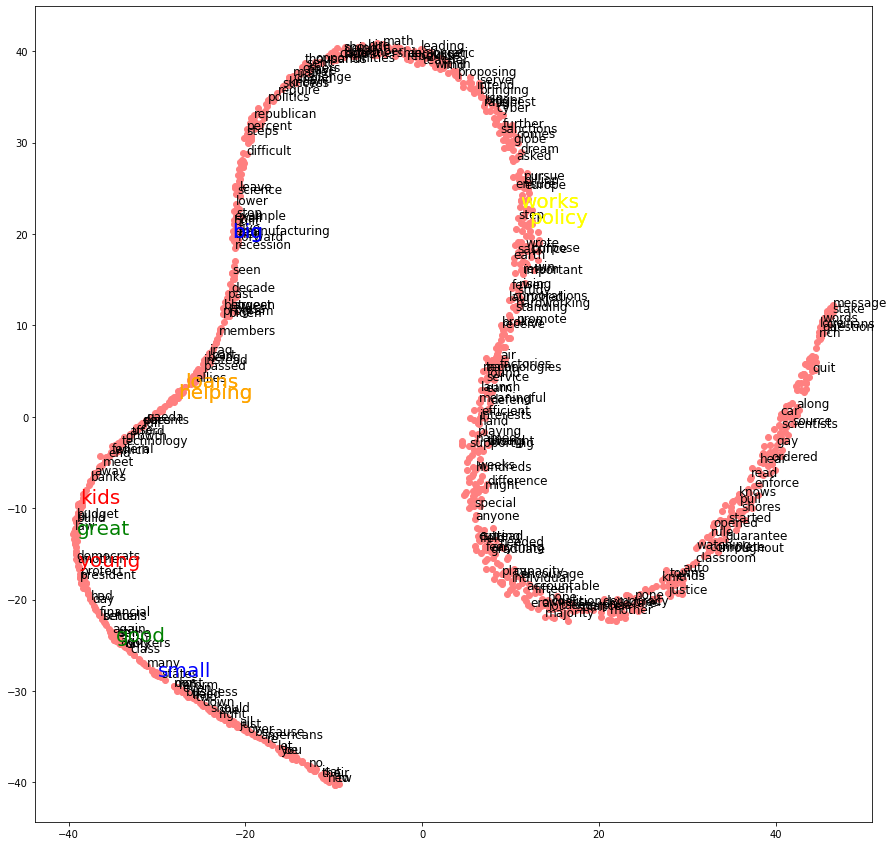

In [53]:
def plot_with_matplotlib(x_vals, y_vals, words, must_include, random_include):
    plt.figure(figsize=(15, 15))
    plt.scatter(x_vals, y_vals, color=[1., 0.5, 0.5])

    indices = list(range(len(words)))
    random.seed(1)
    selected_indices = random.sample(indices, random_include)
    selected_indices.extend([i for i in indices if words[i] in must_include])
    extend_indices = [i for i in indices if words[i] in must_include]
    color_list = ['red', 'blue', 'green', 'yellow', 'orange']
    for i in selected_indices:
        if words[i] in must_include:
            plt.annotate(words[i], (x_vals[i], y_vals[i]), fontsize=20, color=color_list[must_include.index(words[i]) // 2])
        else:
            plt.annotate(words[i], (x_vals[i], y_vals[i]), fontsize=12)

must_include = ['kids', 'young', 'big', 'small', 'good', 'great', 'works', 'policy', 'helping', 'loans']
plot_with_matplotlib(tsne[:, 0], tsne[:, 1], list(model.wv.vocab.keys()), must_include, random_include=250)
# print('list(model.wv.vocab.keys())', list(model.wv.vocab.keys()))

### Answers
* ('works', 'policy'), ('young', 'kids') and ('helping', 'loans') are very close to each other respectively. It is because these two words are often appearing together. So thier similarity is very hign in word2vec, so even though we lower the dimensionality to 2, these 2 words are still close to each other.
* 'small' and 'big' are antonym. So after loweing dimensionality, these 2 vectors are still far away.
* 'good' and 'great' are synonym, so they are close to wach other. 